 - The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th.
 - The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

 - The aim of this project is to merge 2015, 2016 and 2017 data and remove the missing values and duplicate data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wh_2015 = pd.read_csv("wh_2015.csv")
wh_2016 = pd.read_csv("wh_2016.csv")
wh_2017 = pd.read_csv("wh_2017.csv")

In [3]:
wh_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
Country                          164 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null float64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
Year                             164 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.8+ KB


In [4]:
wh_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 14 columns):
Country                          164 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null float64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
Year                             164 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 18.1+ KB


In [5]:
wh_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
Country                          164 non-null object
Happiness.Rank                   155 non-null float64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
Year                             164 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 16.8+ KB


# Streamline columns names
   - First of all streamline the column names which are similar in all the three datasets. 

In [6]:
print(wh_2015.columns)
print(wh_2016.columns)
print(wh_2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')


In [7]:
wh_2015.columns = wh_2015.columns.str.capitalize().str.replace(r"[\(\)]", "").str.replace("\s+", "_")

In [8]:
wh_2015.columns

Index(['Country', 'Region', 'Happiness_rank', 'Happiness_score',
       'Standard_error', 'Economy_gdp_per_capita', 'Family',
       'Health_life_expectancy', 'Freedom', 'Trust_government_corruption',
       'Generosity', 'Dystopia_residual', 'Year'],
      dtype='object')

In [9]:
wh_2016.columns = wh_2016.columns.str.capitalize().str.replace(r"[\(\)]", "").str.replace("\s+", "_")

In [10]:
wh_2016.columns

Index(['Country', 'Region', 'Happiness_rank', 'Happiness_score',
       'Lower_confidence_interval', 'Upper_confidence_interval',
       'Economy_gdp_per_capita', 'Family', 'Health_life_expectancy', 'Freedom',
       'Trust_government_corruption', 'Generosity', 'Dystopia_residual',
       'Year'],
      dtype='object')

In [11]:
wh_2017.columns = wh_2017.columns.str.capitalize().str.replace(".", " ").str.strip().str.replace("\s+", "_")

In [12]:
wh_2017.columns

Index(['Country', 'Happiness_rank', 'Happiness_score', 'Whisker_high',
       'Whisker_low', 'Economy_gdp_per_capita', 'Family',
       'Health_life_expectancy', 'Freedom', 'Generosity',
       'Trust_government_corruption', 'Dystopia_residual', 'Year'],
      dtype='object')

# Concatenate all 3 dataframes

In [13]:
world_happiness = pd.concat([wh_2015,wh_2016,wh_2017], axis= 0 , ignore_index= False, sort= False)

In [14]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 163
Data columns (total 17 columns):
Country                        492 non-null object
Region                         315 non-null object
Happiness_rank                 470 non-null float64
Happiness_score                470 non-null float64
Standard_error                 158 non-null float64
Economy_gdp_per_capita         470 non-null float64
Family                         470 non-null float64
Health_life_expectancy         470 non-null float64
Freedom                        470 non-null float64
Trust_government_corruption    470 non-null float64
Generosity                     470 non-null float64
Dystopia_residual              470 non-null float64
Year                           492 non-null int64
Lower_confidence_interval      157 non-null float64
Upper_confidence_interval      157 non-null float64
Whisker_high                   155 non-null float64
Whisker_low                    155 non-null float64
dtypes: float64

In [15]:
world_happiness.shape

(492, 17)

# Fill missing values in Region column

In [16]:
region_2015 = pd.DataFrame({"Country": wh_2015["Country"], "Region": wh_2016["Region"]})

In [17]:
region_2015.head()

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,Western Europe


In [18]:
region_2016 = pd.DataFrame({"Country": wh_2016["Country"], "Region": wh_2016["Region"]})

In [19]:
region_2016.head()

,Country,Region
0,Denmark,Western Europe
1,Switzerland,Western Europe
2,Iceland,Western Europe
3,Norway,Western Europe
4,Finland,Western Europe


In [20]:
region = pd.merge(region_2015, region_2016, on= "Country", how= "left", suffixes= ("_2015", "_2016") )

In [21]:
region.head()

,Country,Region_2015,Region_2016
0,Switzerland,Western Europe,Western Europe
1,Iceland,Western Europe,Western Europe
2,Denmark,Western Europe,Western Europe
3,Norway,Western Europe,Western Europe
4,Canada,Western Europe,North America


In [22]:
region.isnull().sum()

Country        0
Region_2015    7
Region_2016    7
dtype: int64

In [23]:
region[region["Region_2015"].isnull()]

,Country,Region_2015,Region_2016
157,Togo,NaN,Sub-Saharan Africa
158,Belize,NaN,Latin America and Caribbean
159,Namibia,NaN,Sub-Saharan Africa
160,Puerto Rico,NaN,Latin America and Caribbean
161,Somalia,NaN,Sub-Saharan Africa
162,Somaliland Region,NaN,Sub-Saharan Africa
163,South Sudan,NaN,Sub-Saharan Africa


In [24]:
region[region["Region_2016"].isnull()]

,Country,Region_2015,Region_2016
21,Oman,Southeastern Asia,NaN
90,Somaliland region,Central and Eastern Europe,NaN
93,Mozambique,Western Europe,NaN
96,Lesotho,Sub-Saharan Africa,NaN
100,Swaziland,Eastern Asia,NaN
125,Djibouti,Central and Eastern Europe,NaN
147,Central African Republic,Sub-Saharan Africa,NaN


In [25]:
region.loc[region["Region_2015"].isnull(), "Region_2015"] = region["Region_2016"]

In [26]:
region.isnull().sum()

Country        0
Region_2015    0
Region_2016    7
dtype: int64

In [27]:
region.drop("Region_2016", axis= 1, inplace= True)

In [28]:
region.rename({"Region_2015": "Region"}, axis= 1, inplace= True)

In [29]:
region.head()

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,Western Europe


In [30]:
world_happiness = pd.merge(world_happiness, region, on= "Country", how= "left")

In [31]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 18 columns):
Country                        492 non-null object
Region_x                       315 non-null object
Happiness_rank                 470 non-null float64
Happiness_score                470 non-null float64
Standard_error                 158 non-null float64
Economy_gdp_per_capita         470 non-null float64
Family                         470 non-null float64
Health_life_expectancy         470 non-null float64
Freedom                        470 non-null float64
Trust_government_corruption    470 non-null float64
Generosity                     470 non-null float64
Dystopia_residual              470 non-null float64
Year                           492 non-null int64
Lower_confidence_interval      157 non-null float64
Upper_confidence_interval      157 non-null float64
Whisker_high                   155 non-null float64
Whisker_low                    155 non-null float64
Region_y       

In [32]:
world_happiness.drop("Region_x", axis= 1, inplace= True)

In [33]:
world_happiness.rename({"Region_y": "Region"}, axis= 1, inplace= True)

In [34]:
world_happiness.head()

,Country,Happiness_rank,Happiness_score,Standard_error,Economy_gdp_per_capita,Family,Health_life_expectancy,Freedom,Trust_government_corruption,Generosity,Dystopia_residual,Year,Lower_confidence_interval,Upper_confidence_interval,Whisker_high,Whisker_low,Region
0,Switzerland,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,Western Europe
1,Iceland,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,Western Europe
2,Denmark,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,Western Europe
3,Norway,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,Western Europe
4,Canada,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,Western Europe


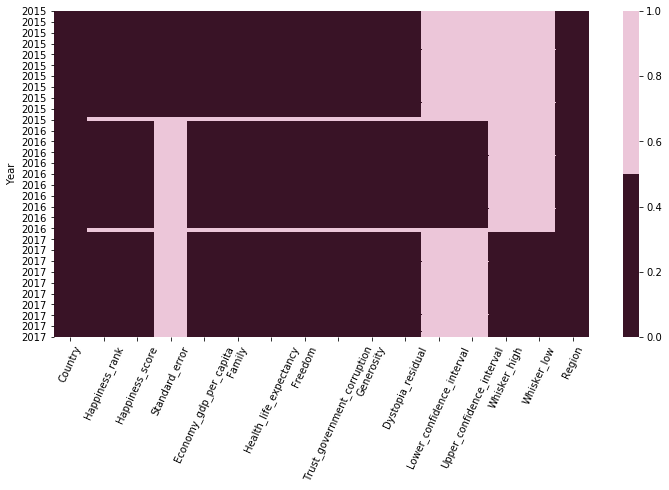

In [74]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(world_happiness.set_index("Year").isnull(), cmap = ["#391326", "#ecc6d9"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 65)

plt.show()

# Remove duplicate data of a country

In [36]:
world_happiness.duplicated().sum()

0

In [37]:
world_happiness.duplicated(["Country", "Year"]).sum()

0

In [38]:
world_happiness["Country"] = world_happiness["Country"].str.upper()

In [39]:
world_happiness.duplicated(["Country", "Year"]).sum()

3

In [40]:
world_happiness[world_happiness.duplicated(["Country", "Year"])]

,Country,Happiness_rank,Happiness_score,Standard_error,Economy_gdp_per_capita,Family,Health_life_expectancy,Freedom,Trust_government_corruption,Generosity,Dystopia_residual,Year,Lower_confidence_interval,Upper_confidence_interval,Whisker_high,Whisker_low,Region
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Central and Eastern Europe
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Central and Eastern Europe


In [41]:
world_happiness.drop_duplicates(["Country", "Year"], inplace= True)

In [42]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 491
Data columns (total 17 columns):
Country                        489 non-null object
Happiness_rank                 470 non-null float64
Happiness_score                470 non-null float64
Standard_error                 158 non-null float64
Economy_gdp_per_capita         470 non-null float64
Family                         470 non-null float64
Health_life_expectancy         470 non-null float64
Freedom                        470 non-null float64
Trust_government_corruption    470 non-null float64
Generosity                     470 non-null float64
Dystopia_residual              470 non-null float64
Year                           489 non-null int64
Lower_confidence_interval      157 non-null float64
Upper_confidence_interval      157 non-null float64
Whisker_high                   155 non-null float64
Whisker_low                    155 non-null float64
Region                         489 non-null object
dtypes: float64

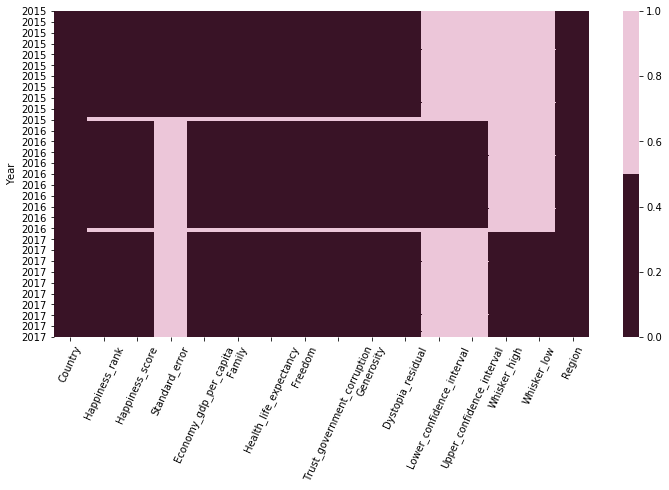

In [72]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(world_happiness.set_index("Year").isnull(), cmap = ["#391326", "#ecc6d9"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 65)

plt.show()

In [75]:
world_happiness.shape

(489, 17)

In [76]:
world_happiness.notnull().sum()

Country                        489
Happiness_rank                 470
Happiness_score                470
Standard_error                 158
Economy_gdp_per_capita         470
Family                         470
Health_life_expectancy         470
Freedom                        470
Trust_government_corruption    470
Generosity                     470
Dystopia_residual              470
Year                           489
Lower_confidence_interval      157
Upper_confidence_interval      157
Whisker_high                   155
Whisker_low                    155
Region                         489
dtype: int64

In [78]:
world_happiness.dropna(thresh = 159, axis = 1, inplace = True)

In [79]:
world_happiness.isnull().sum()

Country                         0
Happiness_rank                 19
Happiness_score                19
Economy_gdp_per_capita         19
Family                         19
Health_life_expectancy         19
Freedom                        19
Trust_government_corruption    19
Generosity                     19
Dystopia_residual              19
Year                            0
Region                          0
dtype: int64

In [80]:
world_happiness.shape

(489, 12)

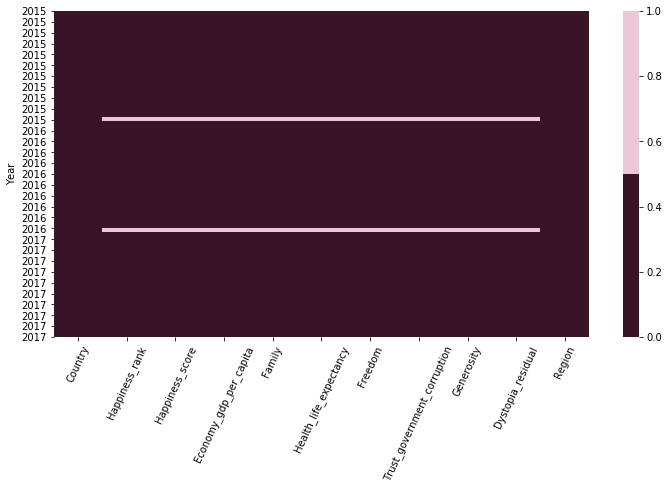

In [81]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(world_happiness.set_index("Year").isnull(), cmap = ["#391326", "#ecc6d9"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 65)

plt.show()

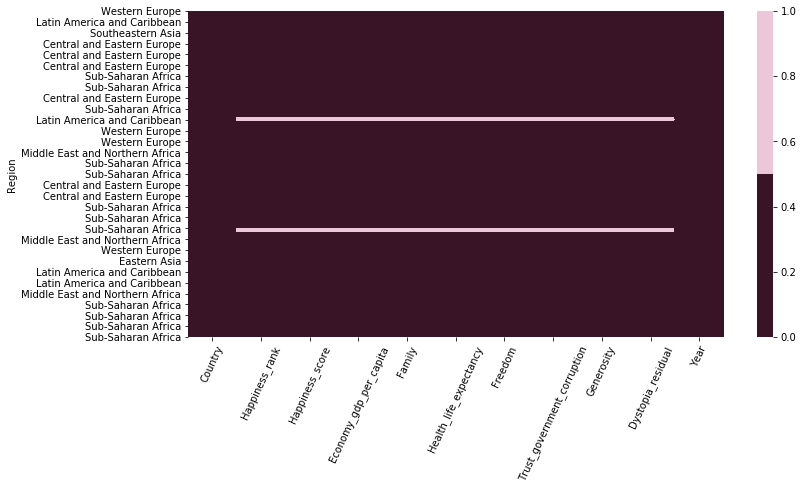

In [84]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(world_happiness.set_index("Region").isnull(), cmap = ["#391326", "#ecc6d9"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 65)

plt.show()

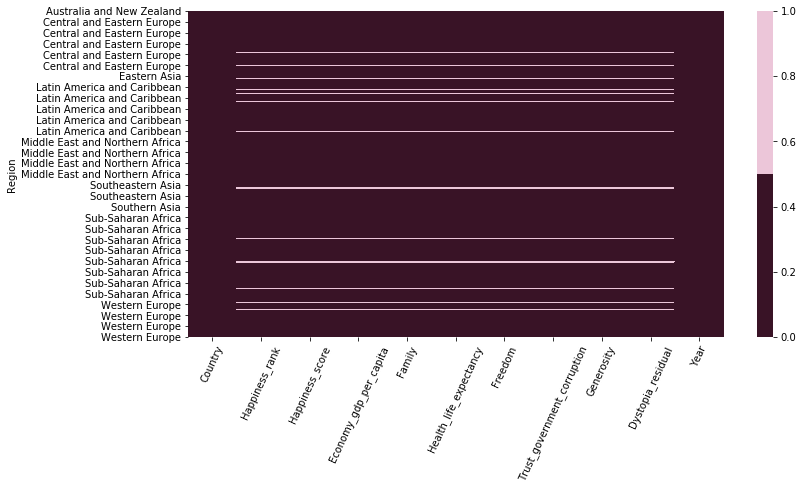

In [86]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(world_happiness.sort_values("Region").set_index("Region").isnull(), cmap = ["#391326", "#ecc6d9"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 65)

plt.show()

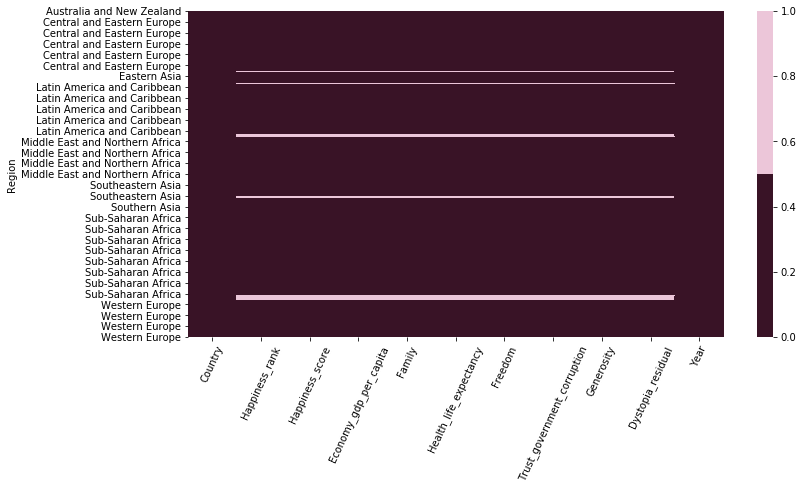

In [88]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(world_happiness.sort_values(["Region","Happiness_score"]).set_index("Region").isnull(), cmap = ["#391326", "#ecc6d9"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 65)

plt.show()

In [89]:
world_happiness.dropna(axis = 0, inplace = True)

In [90]:
world_happiness.shape

(470, 12)

In [91]:
world_happiness.isnull().sum()

Country                        0
Happiness_rank                 0
Happiness_score                0
Economy_gdp_per_capita         0
Family                         0
Health_life_expectancy         0
Freedom                        0
Trust_government_corruption    0
Generosity                     0
Dystopia_residual              0
Year                           0
Region                         0
dtype: int64

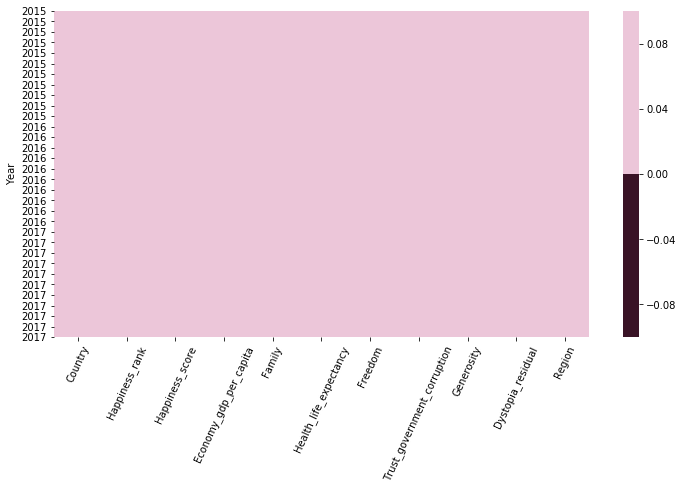

In [92]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(world_happiness.set_index("Year").isnull(), cmap = ["#391326", "#ecc6d9"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 65)

plt.show()